## Load data

In [1]:
import numpy as np
import pandas as pd

In [2]:
md = pd.read_csv("../datasets/model_data.csv") 

In [3]:
md = md.sort_values(by = 'date')

In [4]:
md

,Unnamed: 0,date,sentiment,open,high,low,close,polarity
68,710,2022-01-04,0,396.516663,402.666656,374.350006,383.196655,Decrease
67,708,2022-01-04,1,396.516663,402.666656,374.350006,383.196655,Decrease
66,700,2022-01-05,1,382.216675,390.113342,360.336670,362.706665,Decrease
65,696,2022-01-06,1,359.000000,362.666656,340.166656,354.899994,Decrease
64,693,2022-01-07,1,360.123322,360.309998,336.666656,342.320007,Decrease
...,...,...,...,...,...,...,...,...
4,42,2022-03-02,0,290.709991,295.493347,281.423340,293.296661,Increase
3,13,2022-03-03,0,292.923340,295.480011,277.533325,279.763336,Decrease
2,12,2022-03-03,1,292.923340,295.480011,277.533325,279.763336,Decrease
1,1,2022-03-04,1,283.033325,285.216675,275.053345,279.429993,Decrease


In [5]:
md = md.drop(['Unnamed: 0','date'],axis=1)

In [6]:
md

,sentiment,open,high,low,close,polarity
68,0,396.516663,402.666656,374.350006,383.196655,Decrease
67,1,396.516663,402.666656,374.350006,383.196655,Decrease
66,1,382.216675,390.113342,360.336670,362.706665,Decrease
65,1,359.000000,362.666656,340.166656,354.899994,Decrease
64,1,360.123322,360.309998,336.666656,342.320007,Decrease
...,...,...,...,...,...,...
4,0,290.709991,295.493347,281.423340,293.296661,Increase
3,0,292.923340,295.480011,277.533325,279.763336,Decrease
2,1,292.923340,295.480011,277.533325,279.763336,Decrease
1,1,283.033325,285.216675,275.053345,279.429993,Decrease


In [7]:
# construct datasets for analysis
target = 'polarity'
predictors = list(md.columns)
predictors.remove(target)
X = md[predictors]
y = md[target]

In [8]:
split_point = int(len(X)*0.7)
X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

In [9]:
X_train

,sentiment,open,high,low,close
68,0,396.516663,402.666656,374.350006,383.196655
67,1,396.516663,402.666656,374.350006,383.196655
66,1,382.216675,390.113342,360.336670,362.706665
65,1,359.000000,362.666656,340.166656,354.899994
64,1,360.123322,360.309998,336.666656,342.320007
63,0,360.123322,360.309998,336.666656,342.320007
62,1,333.333344,353.033325,326.666656,352.706665
61,0,351.223328,358.616669,346.273346,354.799988
60,1,351.223328,358.616669,346.273346,354.799988
59,0,359.616669,371.613342,357.529999,368.739990


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
y_pred = knn.predict(X_test)

c:\Users\mukes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [12]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5714285714285714


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    Decrease       0.70      0.54      0.61        13
    Increase       0.45      0.62      0.53         8

    accuracy                           0.57        21
   macro avg       0.58      0.58      0.57        21
weighted avg       0.61      0.57      0.58        21



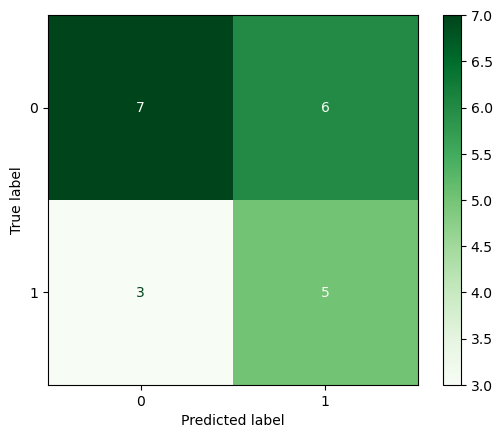

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
c = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(c)
disp.plot(cmap='Greens')